In [4]:
import galsim 
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
g1 = .3
g2 = 0.

gal = galsim.Gaussian(flux=1.,half_light_radius=1.).shear(g1=g1,g2=g2)
img = gal.drawImage(scale=.2,nx=40,ny=40)

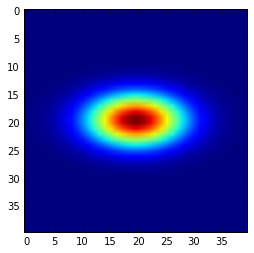

In [6]:
img= plt.imshow(img.array)

0.00433913 0.00523986
(0.9100000819000087, 0.0)


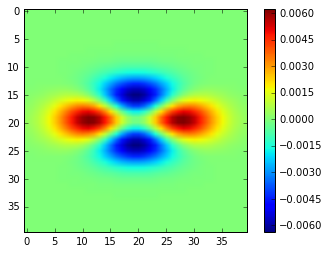

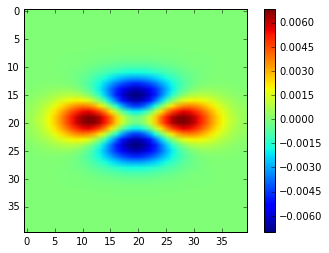

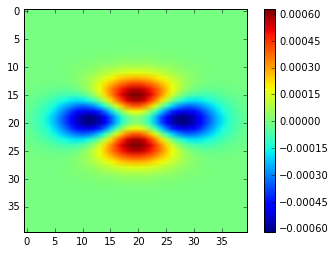

In [31]:
delta_g1 = .01
partial1 = (gal.shear(g1=delta_g1,g2=0) - gal.shear(g1=-delta_g1,g2=0))/(2*delta_g1)
partial2 = ((galsim.Gaussian(flux=1.,half_light_radius=1.).shear(g1=g1+delta_g1,g2=g2)) -(galsim.Gaussian(flux=1.,half_light_radius=1.).shear(g1=g1-delta_g1,g2=g2)))/(2*delta_g1) 

img_partial1 = partial1.drawImage(scale=.2,nx=40,ny=40)
img_partial2 = partial2.drawImage(scale=.2,nx=40,ny=40)

plt.figure()
img1= plt.imshow(img_partial1.array)
plt.colorbar()

plt.figure()
img2 = plt.imshow(img_partial2.array)
plt.colorbar()

plt.figure()
img_diff = plt.imshow(img_partial1.array - img_partial2.array)
plt.colorbar()

f1 = np.sum((img_partial1.array)*(img_partial1.array))
f2 = np.sum((img_partial2.array)*(img_partial2.array))



print f1,f2
print Diffe1g1(g1,g2)
print 'They are different in up to 10%!'

0.00433913 0.00433913
Difference disappears multiplying times appropiate partial!


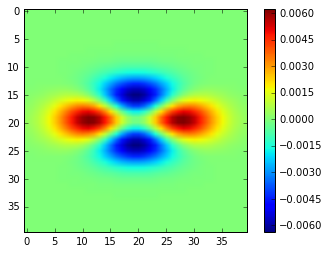

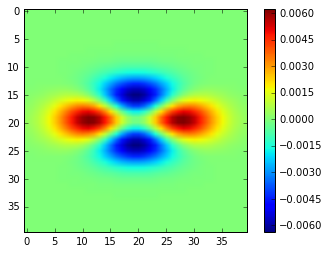

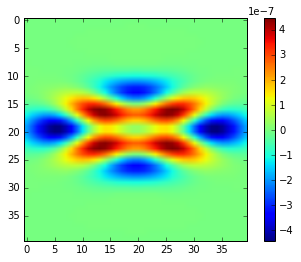

In [35]:
delta_g1 = .01
partial1 = (gal.shear(g1=delta_g1,g2=0) - gal.shear(g1=-delta_g1,g2=0))/(2*delta_g1)
partial2 = ((galsim.Gaussian(flux=1.,half_light_radius=1.).shear(g1=g1+delta_g1,g2=g2)) -(galsim.Gaussian(flux=1.,half_light_radius=1.).shear(g1=g1-delta_g1,g2=g2)))/(2*delta_g1) 

img_partial1 = partial1.drawImage(scale=.2,nx=40,ny=40)
img_partial2 = partial2.drawImage(scale=.2,nx=40,ny=40)*Diffe1g1(g1,g2)[0]


plt.figure()
img1= plt.imshow(img_partial1.array)
plt.colorbar()

plt.figure()
img2 = plt.imshow(img_partial2.array)
plt.colorbar()

plt.figure()
img_diff = plt.imshow(img_partial1.array - img_partial2.array)
plt.colorbar()

f1 = np.sum((img_partial1.array)*(img_partial1.array))
f2 = np.sum((img_partial2.array)*(img_partial2.array))



print f1,f2
print 'Difference disappears multiplying times appropiate partial!'

In [34]:
#can we account for the difference with partials? 
def Diffe1g1(g1,g2):
    step = .001
    e0 = galsim.Shear(g1=g1,g2=g2)
    e_up = e0 + galsim.Shear(g1=step,g2=0)
    e_down = e0 + galsim.Shear(g1=-step,g2=0)
    return (e_up.g1-e_down.g1)/(2*step), (e_up.g2-e_down.g2)/(2*step)


In [29]:
Diffe1g1(g1,g2)


(0.9100000819000087, 0.0)